In [65]:
# 三大件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 股票数据相关的库
import sys
import os
sys.path.append("../../FinanceDataSource")
import FinanceDataSource
from FinanceDataSource import get_cn_stocks
from FinanceDataSource import get_data
from FinanceDataSource import str_cn_stock
from FinanceDataSource import get_cn_bars_all
import talib
import datetime
# 更好的画图的
import seaborn as sns #要注意的是一旦导入了seaborn，matplotlib的默认作图风格就会被覆盖成seaborn的格式

In [66]:
# 我这里以000001股票为例。这个应该是第一支股票吧，
_stock_data=get_data(FinanceDataSource.str_cn_stock,"000001")
_stock_data

,Open,High,Low,Close,volume,Amount
,,,,,,
2005-01-04,1.552016,1.552016,1.521400,1.535531,7.476649e+06,11465602
2005-01-05,1.535531,1.542596,1.495494,1.521400,1.368151e+07,20718558
2005-01-06,1.530821,1.552016,1.519045,1.535531,1.132183e+07,17333840
2005-01-07,1.549661,1.554372,1.521400,1.533176,8.008765e+06,12302853
2005-01-10,1.533176,1.552016,1.500204,1.552016,1.117594e+07,17111498
2005-01-12,1.554372,1.556727,1.523755,1.537886,6.957934e+06,10672635
2005-01-13,1.537886,1.554372,1.530821,1.547306,6.797029e+06,10504590
2005-01-14,1.549661,1.554372,1.528465,1.530821,6.813996e+06,10476658
2005-01-17,1.523755,1.523755,1.462522,1.471943,1.346608e+07,20039970


我这里要做softmax回归，输出是相对于昨天的涨幅，是百分比表示。为了有意义，我这里是做，比如统计昨天的数据，预测今天的数据的。

# 用线性回归分析

## 方法1：将前N日所有的开盘价，收盘价、最高价、最低价和交易量作为x，然后拟合。

In [67]:
# 原先的数据格式大概是如下的
#开盘价 收盘价 最高价 最低价 金额
# 1       2     3       5     5
# 这个一行只是代表当天的开盘价，收盘价，而我需要的是每一行都有前面n天的数据
# 这个需要数据上移下移来得到。
# pandas平移用shift函数
#因为这个是作为预测来用的，所以当天的数据是不能够算数的。实际上是算出当天的数据。
# 我这里设定从index_1开始的列作为x，而open,high,low,close,valume,amount作为y
_stock_data_x=_stock_data.shift() #第一天平移
_stock_data_x['index_']=_stock_data_x.index #设置index，方便根据这个键合并
n=60
for i in range(2,n):
    _tmp=_stock_data.shift(i)
    _tmp['index_']=_tmp.index # 根据这个键合并。
    # 合并
    _stock_data_x=pd.merge(_stock_data_x,_tmp,on='index_',suffixes=('','_'+(str(i))))
del(_stock_data_x['index_']) #删除这个列吧，没用了。
print("{},{}".format(len(_stock_data),len(_stock_data_x)))
_stock_data_x

3037,3037


,Open,High,Low,Close,volume,Amount,Open_2,High_2,Low_2,Close_2,...,Low_58,Close_58,volume_58,Amount_58,Open_59,High_59,Low_59,Close_59,volume_59,Amount_59
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.552016,1.552016,1.521400,1.535531,7.476649e+06,1.146560e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.535531,1.542596,1.495494,1.521400,1.368151e+07,2.071856e+07,1.552016,1.552016,1.521400,1.535531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.530821,1.552016,1.519045,1.535531,1.132183e+07,1.733384e+07,1.535531,1.542596,1.495494,1.521400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.549661,1.554372,1.521400,1.533176,8.008765e+06,1.230285e+07,1.530821,1.552016,1.519045,1.535531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.533176,1.552016,1.500204,1.552016,1.117594e+07,1.711150e+07,1.549661,1.554372,1.521400,1.533176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.554372,1.556727,1.523755,1.537886,6.957934e+06,1.067264e+07,1.533176,1.552016,1.500204,1.552016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.537886,1.554372,1.530821,1.547306,6.797029e+06,1.050459e+07,1.554372,1.556727,1.523755,1.537886,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.549661,1.554372,1.528465,1.530821,6.813996e+06,1.047666e+07,1.537886,1.554372,1.530821,1.547306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.523755,1.523755,1.462522,1.471943,1.346608e+07,2.003997e+07,1.549661,1.554372,1.528465,1.530821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:

n1=int((len(_stock_data)-n)*0.8) # 80%的数据作为训练集
# 设置训练集
_stock_data_traning_x=_stock_data_x[n:n1]
_stock_data_traning_y=_stock_data[n:n1]
# 将训练集的格式转化成矩阵的
_matrix_traning_x=np.matrix(_stock_data_traning_x)
_matrix_traning_y=np.matrix(_stock_data_traning_y['Close']).T
print("训练集数量x:{},y:{}".format(len(_stock_data_traning_x),len(_stock_data_traning_y)))
# 设置测试集
_stock_data_testing_x=_stock_data_x[n1:]
_stock_data_testing_y=_stock_data[n1:]
# 将测试集的格式转化成矩阵的
_matrix_testing_x=np.matrix(_stock_data_testing_x)
_matrix_testing_y=np.matrix(_stock_data_testing_y['Close']).T
print("测试集数量x:{},y:{}".format(len(_matrix_testing_x),len(_matrix_testing_y)))

训练集数量x:2321,y:2321
测试集数量x:656,y:656


### 最小二乘法之L1约束

In [69]:
_theta=np.linalg.inv(_matrix_traning_x.T*_matrix_traning_x)*(_matrix_traning_x.T*_matrix_traning_y-0.5)
_theta

matrix([[ 2.53686713e-02],
        [ 2.76191447e-01],
        [ 2.88741475e-01],
        [ 6.70606730e-01],
        [-2.08950911e-10],
        [ 4.08864143e-11],
        [-1.22513042e-01],
        [ 1.79188671e-01],
        [ 2.10002909e-01],
        [-5.37870576e-01],
        [ 6.17998904e-11],
        [ 2.11945399e-11],
        [-3.48214146e-02],
        [ 6.33515886e-02],
        [ 3.70913843e-02],
        [-4.08208663e-02],
        [ 6.75655993e-11],
        [-8.49592572e-12],
        [-1.49331946e-01],
        [ 8.20828712e-02],
        [ 6.05683222e-03],
        [-6.66126251e-02],
        [ 4.78851634e-10],
        [-8.64608605e-11],
        [ 3.29652259e-02],
        [ 1.56020718e-01],
        [ 1.48478095e-02],
        [-5.46267222e-02],
        [-1.09061868e-10],
        [ 1.81845552e-11],
        [ 6.16915229e-02],
        [-4.29129715e-02],
        [-5.57840122e-02],
        [-3.50910982e-02],
        [-1.36573191e-10],
        [ 2.28290592e-12],
        [ 2.81497356e-02],
 

In [70]:
result=pd.DataFrame(_matrix_testing_x*_theta)
result.columns=["calulae_y"]
result["real_y"]=_matrix_testing_y
result['error_percent']=(result['real_y']-result['calulae_y'])/result['real_y']*100
result.index=_stock_data_testing_y.index
result

,calulae_y,real_y,error_percent
,,,
2015-06-05,13.188904,13.191508,0.019744
2015-06-08,13.464937,13.992710,3.771774
2015-06-09,13.619406,13.741829,0.890876
2015-06-10,14.081489,13.499040,-4.314744
2015-06-11,13.637609,13.337181,-2.252556
2015-06-12,12.956200,13.361460,3.033053
2015-06-15,13.102600,12.883976,-1.696869
2015-06-16,12.920235,12.657373,-2.076746
2015-06-17,12.763841,12.730210,-0.264184


In [71]:
result['error_percent'].mean()

0.15234428749328338

In [72]:
result['error_percent'].std()

2.398817808316206

In [73]:
result['error_percent'].min()

-16.334228290012536

In [74]:
# 这个负数相当于，我亏了这么多，计算出来的是涨停，结果是跌停。

In [75]:
result['error_percent'].max()

8.916629499150087

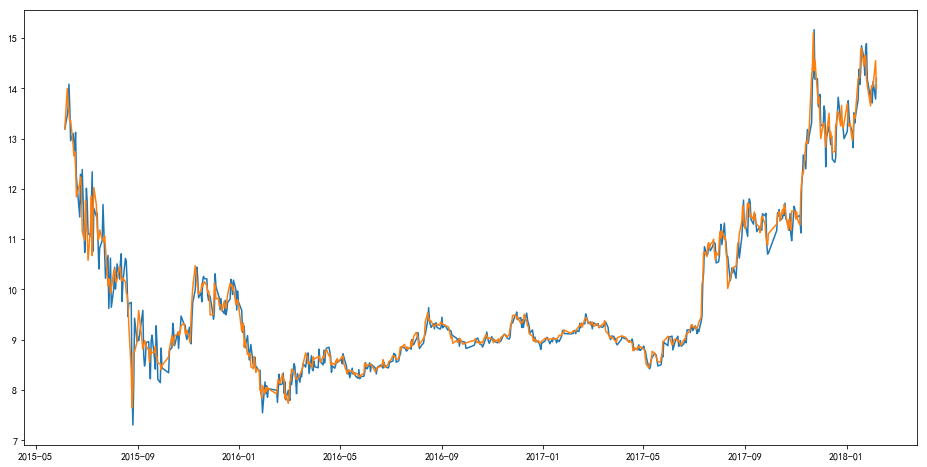

In [79]:
plt. figure(figsize=(16, 8))
plt.plot(result.index,result['calulae_y'])
plt.plot(result.index,result['real_y'])

In [84]:
# 看看condition number ，是否存在ill-condition
from numpy import linalg as LA
LA.cond(_theta)
# 这结果是不是太好了

1.0

### 最小二乘法之L2约束

In [87]:
_theta_2=np.linalg.inv(_matrix_traning_x.T*_matrix_traning_x+np.eye(len(_matrix_traning_x.T)))*(_matrix_traning_x.T*_matrix_traning_y)
_theta_2

matrix([[ 4.68669381e-03],
        [ 2.79238571e-01],
        [ 2.76801549e-01],
        [ 6.60005250e-01],
        [-2.26246956e-10],
        [ 4.65493606e-11],
        [-6.55003516e-02],
        [ 1.07977915e-01],
        [ 1.37888101e-01],
        [-4.15670111e-01],
        [ 4.44467789e-11],
        [ 2.19177989e-11],
        [-2.65137219e-02],
        [ 4.85062381e-02],
        [ 1.88677440e-02],
        [-2.01873234e-02],
        [ 7.17498457e-11],
        [-8.59357533e-12],
        [-1.34477590e-01],
        [ 5.21879368e-02],
        [-1.09946083e-02],
        [-3.35899693e-02],
        [ 4.84110371e-10],
        [-8.50014977e-11],
        [ 2.25988322e-02],
        [ 1.30264011e-01],
        [ 9.23910887e-03],
        [-3.18698947e-02],
        [-9.87584836e-11],
        [ 1.82369558e-11],
        [ 5.91087797e-02],
        [-3.95331890e-02],
        [-5.48964154e-02],
        [-1.15618626e-02],
        [-1.68915216e-10],
        [ 5.38947281e-12],
        [ 1.53042794e-02],
 

In [88]:
result_2=pd.DataFrame(_matrix_testing_x*_theta_2)
result_2.columns=["calulae_y"]
result_2["real_y"]=_matrix_testing_y
result_2['error_percent']=(result_2['real_y']-result_2['calulae_y'])/result_2['real_y']*100
result_2.index=_stock_data_testing_y.index
result

,calulae_y,real_y,error_percent
,,,
2015-06-05,13.188904,13.191508,0.019744
2015-06-08,13.464937,13.992710,3.771774
2015-06-09,13.619406,13.741829,0.890876
2015-06-10,14.081489,13.499040,-4.314744
2015-06-11,13.637609,13.337181,-2.252556
2015-06-12,12.956200,13.361460,3.033053
2015-06-15,13.102600,12.883976,-1.696869
2015-06-16,12.920235,12.657373,-2.076746
2015-06-17,12.763841,12.730210,-0.264184


In [89]:
result_2['error_percent'].mean()

0.14234982303855892

In [90]:
result['error_percent'].std()

2.398817808316206

In [91]:
result['error_percent'].max()

8.916629499150087

In [92]:
result['error_percent'].min()

-16.334228290012536

In [93]:
# 看看condition number ，是否存在ill-condition
from numpy import linalg as LA
LA.cond(_theta_2)

1.0

# 用softmax回归分析